In [1]:
import numpy as np
from scipy import signal
import matplotlib as mpl
from matplotlib import pyplot as plt
import tikzplotlib


Bad key text.latex.preview in file /Users/mbloch/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mbloch/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mbloch/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the

In [2]:
# mpl.use('pgf')

FigWidthPoint = 1.5*252*0.93 # Can be changed
InchesPerPoint = 1 / 72.27
GoldenRatio = (5**.5 - 1) / 2
FigWidthInches = FigWidthPoint * InchesPerPoint
FigHeightInches = FigWidthInches * GoldenRatio

mpl.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.family": "sans serif",
    "font.serif": [],
    "font.sans-serif": ['Helvetica'],
    "font.monospace": [],
    "figure.figsize": [FigWidthInches, FigHeightInches],
    "pgf.preamble": [
        # put LaTeX preamble declarations here
        r"\usepackage{cmbright}"
        #r"\usepackage[utf8x]{inputenc}",
        #r"\usepackage[T1]{fontenc}",
        # macros defined here will be available in plots, e.g.:
        #r"\newcommand{\vect}[1]{#1}",
        # You can use dummy implementations, since you LaTeX document
        # will render these properly, anyway.
    ],
})

In [3]:
np.random.seed(202212)
NumSteps = 50
TimeScale = np.arange(1,NumSteps,1)
x0=0
sigma=1

x = [x0]
y = [0]
for k in TimeScale:
    xk = 0.5*x[-1]+25*x[-1]/(1+x[-1]**2)+8*np.cos(1.2*(k-1))+np.random.randn()
    yk = 1/20*xk**2+np.random.randn()
    x.append(xk)
    y.append(yk)

Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unkno

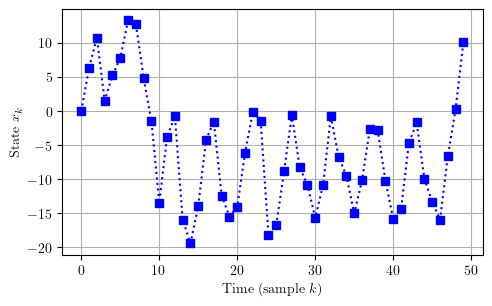

In [4]:
fig  = plt.figure(figsize=(FigWidthInches,FigHeightInches))
fig.set_tight_layout({'pad': 0.5})
ax = plt.subplot(1,1,1)
plt.plot(x[0:],'bs:')
# plt.plot(y[1:],'r+')
plt.xlabel("Time (sample $k$)")
plt.ylabel("State $x_k$");
plt.grid(True)
plt.savefig("Trajectory.pgf")

In [5]:
# Sample particles from initial distribution
NumParticles = 200
p0 = np.sqrt(2)*np.random.randn(NumParticles)

In [6]:
p = np.zeros((NumSteps,NumParticles))
p[0,:] = p0
w = np.ones((NumSteps,NumParticles))/NumParticles
mean = np.zeros(NumSteps)
variance  = np.zeros(NumSteps)
neff = np.zeros(NumSteps)
for k in np.arange(1,NumSteps):
    for j in np.arange(NumParticles):
        kprev = k-1
        # Sampling from importance distribution
        p[k,j] = 0.5*p[k-1,j]+25*p[k-1,j]/(1+p[k-1,j]**2)+8*np.cos(1.2*(k-1))+np.random.randn()
        # Computing weights
        w[k,j] = w[k-1,j]*np.exp(-0.5*(y[k]-1/20*(p[k,j]**2))**2) # likelihood
    w[k,:] = w[k,:] / np.sum(w[k,:])
    neff[k] = 1/np.sum(w[k,:]**2)
    mean[k] = np.average(p[k,:],weights=w[k,:])
    variance[k] = np.average((p[k,:])**2,weights=w[k,:])-(mean[k])**2

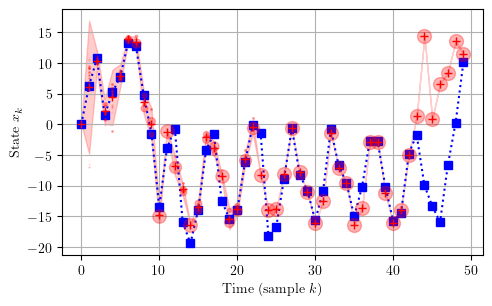

In [7]:
fig  = plt.figure(figsize=(FigWidthInches,FigHeightInches))
fig.set_tight_layout({'pad': 0.5})
ax = plt.subplot(1,1,1)
plt.plot(x[0:],'bs:')
# plt.plot(y[1:],'r+')
plt.xlabel("Time (sample $k$)")
plt.ylabel("State $x_k$");
for k in np.arange(1,NumSteps):
    for j in np.arange(NumParticles):
        if w[k,j]>1e-2:
            plt.plot(k,p[k,j],'ro',alpha=0.3,markersize=10*w[k,j])
plt.plot(mean,'+r')
# plt.plot(mean+np.sqrt(variance),'g')
# plt.plot(mean-np.sqrt(variance),'g')
plt.fill_between(np.arange(NumSteps), mean-2*np.sqrt(variance), mean+2*np.sqrt(variance), alpha=0.2,color="r")
plt.grid(True)
# plt.savefig("TrajectoryFilterNoResampling.pgf")

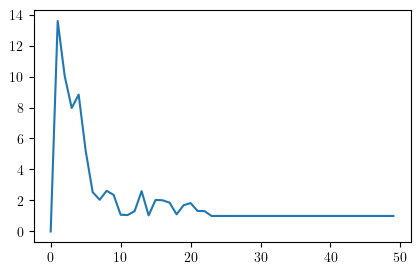

In [8]:
plt.plot(neff)

In [9]:
def resampling(p,w,N=10):
    plist = []
    ulist = np.random.rand(N)
    # print(ulist)
    # print(np.sum(w))
    for k in np.arange(N):
        u = ulist[k]
        # print("Random draw: {:.3f}".format(u))
        i = 0
        cumsum = w[0]
        # print("Cum sum: {:.3f}".format(cumsum))
        # print(u,cumsum)
        # print(u<cumsum)
        while (u>=cumsum):
            # print(i,u,cumsum)
            i = i+1
            cumsum = cumsum + w[i]
            # print("increment")
        # print(i,cumsum)
        plist.append(p[i])
    return(plist)

In [10]:
p = np.zeros((NumSteps,NumParticles))
p[0,:] = p0
w = np.ones((NumSteps,NumParticles))/NumParticles
mean = np.zeros(NumSteps)
variance  = np.zeros(NumSteps)
neff = np.zeros(NumSteps)
for k in np.arange(1,NumSteps):
    for j in np.arange(NumParticles):
        kprev = k-1
        # Sampling from importance distribution
        p[k,j] = 0.5*p[k-1,j]+25*p[k-1,j]/(1+p[k-1,j]**2)+8*np.cos(1.2*(k-1))+np.random.randn()
        # Computing weights
        w[k,j] = w[k-1,j]*np.exp(-0.5*(y[k]-1/20*(p[k,j]**2))**2) # likelihood
    w[k,:] = w[k,:] / np.sum(w[k,:])
    neff[k] = 1/np.sum(w[k,:]**2)
    mean[k] = np.average(p[k,:],weights=w[k,:])
    variance[k] = np.average((p[k,:])**2,weights=w[k,:])-(mean[k])**2
    if neff[k]<20:
        p[k,:] = resampling(p[k,:],w[k,:],N=NumParticles)
        w[k,:] = np.ones(NumParticles)/NumParticles

Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unknown font: sans serif
Ignoring unkno

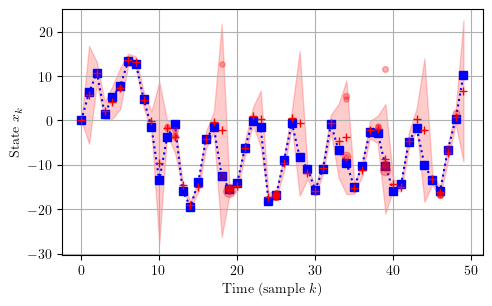

In [11]:
fig  = plt.figure(figsize=(FigWidthInches,FigHeightInches))
fig.set_tight_layout({'pad': 0.5})
ax = plt.subplot(1,1,1)
plt.plot(x[0:],'bs:')
# plt.plot(y[1:],'r+')
plt.xlabel("Time (sample $k$)")
plt.ylabel("State $x_k$");
for k in np.arange(1,NumSteps):
    for j in np.arange(NumParticles):
        if w[k,j]>5e-2:
            plt.plot(k,p[k,j],'ro',alpha=0.3,markersize=70*w[k,j])
plt.plot(mean,'+r')
# plt.plot(mean+np.sqrt(variance),'g')
# plt.plot(mean-np.sqrt(variance),'g')
plt.fill_between(np.arange(NumSteps), mean-2*np.sqrt(variance), mean+2*np.sqrt(variance), alpha=0.2,color="r")
plt.grid(True)
plt.savefig("TrajectoryFilterwithResampling.pgf")

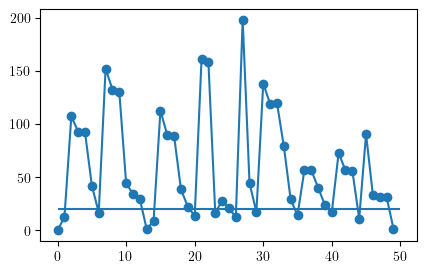

In [12]:
plt.plot(neff,'o-')
plt.hlines(20,0,50)